In [ ]:
import networkx as nx

# Création du graphe de connaissances
G = nx.Graph()

# Ajout des noeuds et des relations
G.add_nodes_from(['Noeud1', 'Noeud2', 'Noeud3', 'Noeud4'])
G.add_edges_from([('Noeud1', 'Noeud2'), ('Noeud2', 'Noeud3'), ('Noeud3', 'Noeud4'), ('Noeud4', 'Noeud1')])

# Partitionnement basé sur les communautés
communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)

# Affichage des partitions
for i, community in enumerate(communities):
    print(f"Partition {i+1} : {community}")


Partition 1 : {'Noeud3', 'Noeud4', 'Noeud1', 'Noeud2'}


In [ ]:
pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 44.7 MB/s eta 0:00:00


In [ ]:
import dgl
import numpy as np

# Chargement des entités
entities = np.genfromtxt('/content/sample_data/entity2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des relations
relations = np.genfromtxt('/content/sample_data/relation2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des triplets d'entraînement
train_triples = np.genfromtxt('/content/sample_data/train.txt', dtype=np.int32, delimiter='\t')

# Chargement des triplets de validation
valid_triples = np.genfromtxt('/content/sample_data/valid.txt', dtype=np.int32, delimiter='\t')

# Chargement des triplets de test
test_triples = np.genfromtxt('/content/sample_data/test.txt', dtype=np.int32, delimiter='\t')

# Création d'un objet DGLGraph
g = dgl.graph((train_triples[:, 0], train_triples[:, 2]), num_nodes=len(entities))

# Affichage du nombre d'entités, de relations et de triplets
print(f"Nombre d'entités : {len(entities)}")
print(f"Nombre de relations : {len(relations)}")
print(f"Nombre de triplets d'entraînement : {len(train_triples)}")
print(f"Nombre de triplets de validation : {len(valid_triples)}")
print(f"Nombre de triplets de test : {len(test_triples)}")


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Nombre d'entités : 14951
Nombre de relations : 1345
Nombre de triplets d'entraînement : 483142
Nombre de triplets de validation : 50000
Nombre de triplets de test : 59071


In [ ]:
import dgl
import numpy as np
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Chargement des entités
entities = np.genfromtxt('/content/sample_data/entity2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des relations
relations = np.genfromtxt('/content/sample_data/relation2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des triplets d'entraînement
train_triples = np.genfromtxt('/content/sample_data/train.txt', dtype=np.int32, delimiter='\t')

# Création d'un objet DGLGraph
g = dgl.graph((train_triples[:, 0], train_triples[:, 2]), num_nodes=len(relations))

# Partitionnement du graphe en communautés
g_nx = g.to_networkx()
communities = list(greedy_modularity_communities(g_nx))

# Affichage du résultat
print(f"Nombre de communautés : {len(communities)}")
for i, c in enumerate(communities):
    print(f"Communauté {i} : {c}")


Nombre de communautés : 1346
Communauté 0 : frozenset({0})
Communauté 1 : frozenset({1})
Communauté 2 : frozenset({2})
Communauté 3 : frozenset({3})
Communauté 4 : frozenset({4})
Communauté 5 : frozenset({5})
Communauté 6 : frozenset({6})
Communauté 7 : frozenset({7})
Communauté 8 : frozenset({8})
Communauté 9 : frozenset({9})
Communauté 10 : frozenset({10})
Communauté 11 : frozenset({11})
Communauté 12 : frozenset({12})
Communauté 13 : frozenset({13})
Communauté 14 : frozenset({14})
Communauté 15 : frozenset({15})
Communauté 16 : frozenset({16})
Communauté 17 : frozenset({17})
Communauté 18 : frozenset({18})
Communauté 19 : frozenset({19})
Communauté 20 : frozenset({20})
Communauté 21 : frozenset({21})
Communauté 22 : frozenset({22})
Communauté 23 : frozenset({23})
Communauté 24 : frozenset({24})
Communauté 25 : frozenset({25})
Communauté 26 : frozenset({26})
Communauté 27 : frozenset({27})
Communauté 28 : frozenset({28})
Communauté 29 : frozenset({29})
Communauté 30 : frozenset({30})

In [ ]:
# Calculer la fréquence d'occurrence de chaque relation dans le KG
rel_counts = Counter([d['relation'] for (u, v, d) in KG.edges(data=True)])

# Calculer l'importance de chaque relation en fonction de la sémantique
rel_importance = {rel: calculate_importance(rel) for rel in rel_counts}

# Calculer les poids de chaque relation en fonction de la fréquence et de l'importance
rel_weights = {rel: rel_counts[rel] * rel_importance[rel] for rel in rel_counts}

# Ajouter les poids de chaque relation comme attribut dans le KG
for (u, v, d) in KG.edges(data=True):
    d['weight'] = rel_weights[d['relation']]

In [ ]:
import matplotlib.pyplot as plt

# Création d'un dictionnaire de couleurs pour les communautés
color_map = {c: np.random.rand(3,) for c in set(partition.values())}

# Affichage du graphe avec les couleurs de communauté
plt.figure(figsize=(16, 12))
nx.draw(g_nx, node_color=[color_map[partition[n]] for n in g_nx.nodes()], node_size=50)
plt.show()


NameError: ignored

In [ ]:
import dgl
import numpy as np
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Chargement des entités
entities = np.genfromtxt('/content/sample_data/entity2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des relations
relations = np.genfromtxt('/content/sample_data/relation2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des triplets d'entraînement
train_triples = np.genfromtxt('/content/sample_data/train.txt', dtype=np.int32, delimiter='\t')

# Calcul des poids en utilisant la distance sémantique entre les relations
relation_embeddings = np.random.rand(len(relations), 50) # Supposons que nous avons des embeddings de relations de dimension 50
relation_similarities = np.dot(relation_embeddings, np.transpose(relation_embeddings))
relation_weights = np.exp(-(relation_similarities - np.max(relation_similarities)) / np.std(relation_similarities))

# Création d'un objet DGLGraph
g = dgl.graph((train_triples[:, 0], train_triples[:, 2]), num_nodes=len(relations))


# Attribution des poids au graphe
g.edata['weight'] = relation_weights[g.edata['relation']]



# Partitionnement du graphe en communautés
g_nx = g.to_networkx()
communities = list(greedy_modularity_communities(g_nx))

# Affichage du résultat
print(f"Nombre de communautés : {len(communities)}")
for i, c in enumerate(communities):
    print(f"Communauté {i} : {c}")


KeyError: ignored

In [ ]:
import dgl
import numpy as np
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Chargement des entités
entities = np.genfromtxt('/content/sample_data/entity2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des relations
relations = np.genfromtxt('/content/sample_data/relation2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des triplets d'entraînement
train_triples = np.genfromtxt('/content/sample_data/train.txt', dtype=np.int32, delimiter='\t')

# Création d'un objet DGLGraph
g = dgl.graph((train_triples[:, 0], train_triples[:, 2]), num_nodes=len(relations))

# Étape 1 : Calcul de la matrice d'adjacence
adj_matrix = g.adjacency_matrix().toarray()

# Étape 2 : Calcul de la matrice des similarités
similarity_matrix = compute_similarity_matrix(adj_matrix)

# Étape 3 : Calcul de la matrice des embeddings
embedding_matrix = compute_embedding_matrix(similarity_matrix)

# Étape 4 : Partitionnement du graphe en communautés
g_nx = g.to_networkx()
communities = list(greedy_modularity_communities(g_nx))

# Étape 5 : Optimisation de la partition obtenue
optimized_communities = optimize_community_partition(communities)

# Étape 6 : Attribution des communautés aux embeddings
community_assignments = assign_communities_to_embeddings(embedding_matrix, optimized_communities)

# Affichage du résultat
print(f"Nombre de communautés : {len(community_assignments)}")
for i, c in enumerate(community_assignments):
    print(f"Communauté {i} : {c}")


AttributeError: ignored

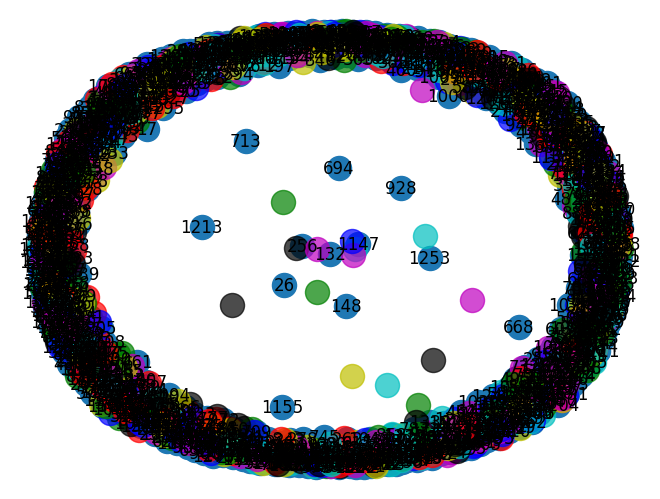

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# dessiner le graphe
nx.draw(g_nx, with_labels=True)

# dessiner chaque communauté avec une couleur différente
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']
for i, c in enumerate(communities):
    nx.draw_networkx_nodes(g_nx, pos=nx.spring_layout(g_nx), nodelist=list(c), node_color=colors[i % len(colors)], alpha=0.7)

plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Chargement des triplets du jeu de données FB15K
df = pd.read_csv('/content/sample_data/train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Nombre de partitions souhaitées
k = 3

# Permutation aléatoire des indices des triplets
indices = np.random.permutation(df.index)

# Division des indices en k sous-ensembles
partitions = np.array_split(indices, k)

# Affichage des résultats
for i, part in enumerate(partitions):
    print(f"Partition {i}: {part}")


Partition 0: [187517 130038 468548 ...  87965 169157 244831]
Partition 1: [464961  81958 103304 ...   4447 182474 385744]
Partition 2: [ 47671  87601 345336 ... 394511 372129  36799]


In [ ]:
import pandas as pd
import networkx as nx

# Chargement des triplets du jeu de données FB15K
df = pd.read_csv('/content/sample_data/train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Création d'un graphe non orienté à partir des triplets
G = nx.from_pandas_edgelist(df, 'head', 'tail', create_using=nx.Graph())

# Exécution de l'algorithme de Louvain
partition = nx.community.best_partition(G)

# Calcul du nombre d'arêtes de coupe pour chaque partition
cut_edges = {}
for edge in G.edges():
    if partition[edge[0]] != partition[edge[1]]:
        if partition[edge[0]], partition[edge[1]] not in cut_edges:
            cut_edges[(partition[edge[0]], partition[edge[1]])] = 1
        else:
            cut_edges[(partition[edge[0]], partition[edge[1]])] += 1

# Affichage du nombre d'arêtes de coupe pour chaque partition
for i in range(k):
    for j in range(i+1, k):
        if (i,j) not in cut_edges:
            print(f"Cut-edge between partitions {i} and {j}: 0")
        else:
            print(f"Cut-edge between partitions {i} and {j}: {cut_edges[(i,j)]}")


SyntaxError: ignored

In [ ]:
pip install community

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
from community import best_partition

# Création du graphe
G = nx.Graph()
# Ajout des arêtes à partir du fichier train.txt
with open('/content/sample_data/train.txt', 'r') as f:
    for line in f:
        head, relation, tail = line.strip().split('\t')
        G.add_edge(head, tail)

# Détection des communautés avec l'algorithme de Louvain
partition = best_partition(G)

# Calcul du nombre d'arêtes de coupe (cut-edges) entre les communautés
cut_edges = 0
for edge in G.edges:
    if partition[edge[0]] != partition[edge[1]]:
        cut_edges += 1

print(f"Nombre d'arêtes de coupe : {cut_edges}")


ImportError: ignored

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.community.quality import cut_size

# Chargement des triplets du jeu de données FB15K
df = pd.read_csv('/content/sample_data/train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Nombre de partitions souhaitées
k = 3

# Permutation aléatoire des indices des triplets
indices = np.random.permutation(df.index)

# Division des indices en k sous-ensembles
partitions = np.array_split(indices, k)

# Création d'un graphe NetworkX à partir des triplets
graph = nx.from_pandas_edgelist(df, 'head', 'tail', 'relation', create_using=nx.MultiDiGraph())

# Pour chaque partition
for i, part in enumerate(partitions):
    # Récupération des nœuds correspondant à la partition
    nodes = set(df.iloc[part]['head']).union(set(df.iloc[part]['tail']))
    # Calcul du nombre de coupures d'arêtes entre la partition et le reste du graphe
    cut_edges = cut_size(graph, nodes)
    # Affichage des résultats
    print(f"Partition {i}: {cut_edges} coupures d'arêtes")


ImportError: ignored

In [ ]:
import numpy as np
import pandas as pd

# Chargement des triplets du jeu de données FB15K
df = pd.read_csv('/content/sample_data/train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Nombre de partitions souhaitées
k = 3

# Permutation aléatoire des indices des triplets
indices = np.random.permutation(df.index)

# Division des indices en k sous-ensembles
partitions = np.array_split(indices, k)

# Boucle sur les partitions
for i, part in enumerate(partitions):
    # Sélection des lignes correspondant à la partition
    partition_df = df.iloc[part]
    # Comptage du nombre de lignes
    num_triplets = len(partition_df)
    # Affichage du résultat
    print(f"Partition {i}: {num_triplets} triplets")


Partition 0: 161048 triplets
Partition 1: 161047 triplets
Partition 2: 161047 triplets


In [ ]:
import numpy as np
import pandas as pddf = pd.read_csv('/content/sample_data/train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])
k = 3
val_test_prop = 0.2
indices = np.random.permutation(df.index)
partitions = np.array_split(indices, k)
for i, part in enumerate(partitions):
# Sélection des lignes correspondant à la partition
partition_df = df.iloc[part]
# Division de la partition en sous-ensembles de train et de validation/test
val_test_size = int(val_test_prop * len(partition_df))
val_test_indices = np.random.choice(partition_df.index, size=val_test_size, replace=False)
train_indices = partition_df.drop(val_test_indices).index
# Sélection des triplets correspondants aux ensembles de train, de validation et de test
train_triplets = df.iloc[train_indices]
val_test_triplets = df.iloc[val_test_indices]
val_triplets = val_test_triplets.sample(frac=0.5) # la moitié pour la validation
test_triplets = val_test_triplets.drop(val_triplets.index) # le reste pour le test
# Affichage du résultat
print(f"Partition {i}: train={len(train_triplets)}, val={len(val_triplets)}, test={len(test_triplets)}")

In [ ]:
import dgl
import numpy as np

# Chargement des entités
entities = np.genfromtxt('/content/sample_data/entity2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des relations
relations = np.genfromtxt('/content/sample_data/relation2id.txt', dtype=np.dtype('U'), delimiter='\t')

# Chargement des triplets d'entraînement
train_triples = np.genfromtxt('/content/sample_data/train.txt', dtype=np.int32, delimiter='\t')

# Ajout 1 à tous les indices des nœuds
train_triples[:, 0] += 1
train_triples[:, 2] += 1

# Création d'un objet DGLGraph
g = dgl.graph((train_triples[:, 0], train_triples[:, 2]), num_nodes=len(entities))

# Calcul de la matrice d'adjacence
adj_matrix = g.adjacency_matrix().to_sparse()

# Calcul de la matrice de similarité
similarity_matrix = adj_matrix @ adj_matrix.transpose()

# Clustering spectral pour partitionner les entités en communautés
num_clusters = len(relations)  # Nombre de clusters = nombre de relations
sc = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', assign_labels='discretize')
clusters = sc.fit_predict(similarity_matrix.to_dense())

# Affichage des résultats
for i, r in enumerate(relations):
    print(f"Communauté pour la relation '{r}' : {np.where(clusters == i)[0]}")



NotImplementedError: ignored

In [ ]:
import pandas as pd

triples = pd.read_csv('/content/sample_data/valid.txt', sep='\t', header=None, names=['subject', 'predicate', 'object'])


In [ ]:
import networkx as nx

graph = nx.from_pandas_edgelist(triples, 'subject', 'object', 'predicate', create_using=nx.MultiDiGraph())
adj_matrix = nx.adjacency_matrix(graph)


In [ ]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.3 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline

In [ ]:
G = nx.karate_club_graph()

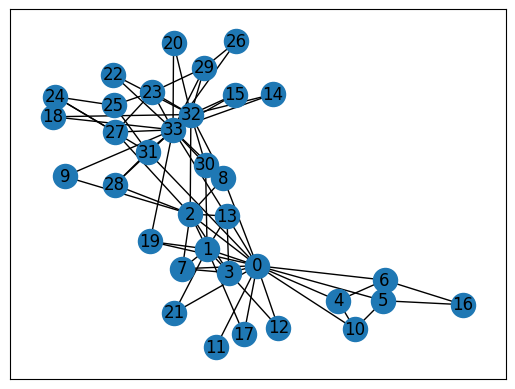

In [ ]:
nx.draw_networkx(G)

In [ ]:
#Edge betweenness
lst_b = nx.algorithms.community.girvan_newman(G)
type(lst_b)

generator

In [ ]:
#Print possible communities
for x in lst_b:
  print(x)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

1


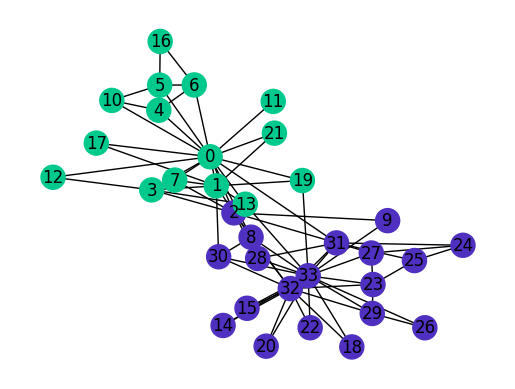

In [ ]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.girvan_newman(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  print(1)
  for c in x:
    for n in c:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1
  break
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [ ]:
#Modularity for different communities
modularity = []
for x in lst_b:
  modularity.append(community.modularity(G, x))
modularity

[0.3423192968647514,
 0.3580611307884035,
 0.3849721706864564,
 0.37578006409175235,
 0.3594760218136841,
 0.3470699574595678,
 0.33324900208017094,
 0.31344052772624204,
 0.3122598901819681,
 0.30368621277712193,
 0.29429733325837226,
 0.28271584115739956,
 0.27116245947414774,
 0.2544648713479881,
 0.23975375274076566,
 0.2268979217031164,
 0.22299057363992417,
 0.20056783043796028,
 0.18696238826108952,
 0.1609134011731414,
 0.1428102921609415,
 0.11768894885778003,
 0.11088622776934465,
 0.10076647738985402,
 0.08837915331421826,
 0.0562395757200952,
 0.04398343359382321,
 0.011515901126290735,
 -0.0035044320758606464,
 -0.03105264144225183,
 -0.04655085174565694,
 -0.05110473941642772]

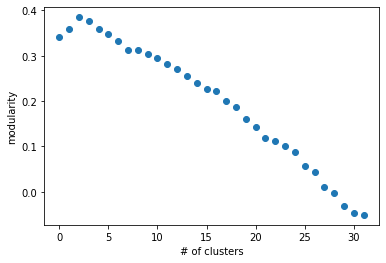

In [ ]:
#Plot modularity
plt.plot(modularity, 'o')
plt.xlabel('# of clusters')
plt.ylabel('modularity')
plt.show()

In [ ]:
#Extract the community with maximum modularity
index = modularity.index(max(modularity))
i=0
for v in lst_b:
    if i==index:
        print(v)
        temp = v
    i+=1

In [ ]:
#Community visualization (the community with maximum modularity)
colors = ["#00C98D", "#5030C0", "#50F0F0", 'red', 'blue']
pos = nx.spring_layout(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in temp:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

NameError: ignored

In [ ]:
community.greedy_modularity_communities(G)

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

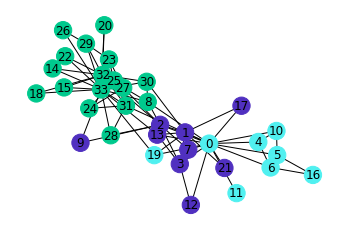

In [ ]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.greedy_modularity_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

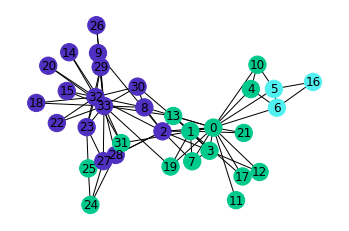

In [ ]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [ ]:
pip install python-louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
colors = ["#00C98D", "#5030C0", "#50F0F0", 'yellow']
pos = nx.spring_layout(G)
lst_m = community_louvain.best_partition(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values

for n in dict(lst_m):
  color_map_b[n] = colors[lst_m[n]]

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

AttributeError: ignored

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

# Détection de communautés avec Louvain
partition = community.best_partition(G)

# Couleurs pour les communautés
colors = ['#00C98D', '#5030C0', '#50F0F0', 'yellow']

# Positionnement des noeuds avec spring_layout
pos = nx.spring_layout(G)

# Association des couleurs aux noeuds en fonction de leur communauté
node_colors = [colors[partition[node]] for node in G.nodes()]

# Affichage du graphique
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()


AttributeError: ignored

In [ ]:
import networkx as nx

# Créer un graphe vide
G = nx.Graph()

# Lire les données à partir du fichier .txt
with open('/content/sample_data/test.txt', 'r') as f:
    lines = f.readlines()

# Ajouter chaque noeud et chaque relation du triplet en tant que noeud du graphe
for line in lines:
    s, p, o = line.strip().split('\t')
    G.add_node(s)
    G.add_node(o)
    G.add_edge(s, o, label=p)

# Afficher le nombre de noeuds et d'arêtes du graphe
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))


13258
35827


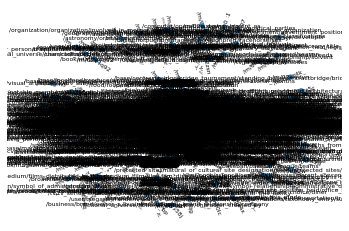

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe vide
G = nx.Graph()

# Lire les données à partir du fichier .txt
with open('/content/sample_data/test.txt', 'r') as f:
    lines = f.readlines()

# Ajouter chaque noeud et chaque relation du triplet en tant que noeud du graphe
for line in lines:
    s, p, o = line.strip().split('\t')
    G.add_node(s)
    G.add_node(o)
    G.add_edge(s, o, label=p)

# Définir la disposition des noeuds dans le graphe
pos = nx.spring_layout(G)




# Dessiner le graphe avec Matplotlib
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# Afficher le graphe
plt.axis('off')
plt.show()


In [ ]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import community

# Calculer la partition du graphe avec la méthode de Louvain
partition = community.best_partition(G)

# Dessiner le graphe avec les communautés identifiées
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = colors[count])
    count += 1

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.axis('off')
plt.show()


AttributeError: ignored

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Charger le graphe à partir du fichier
G = nx.read_edgelist('/content/sample_data/entity2id.txt')

# Calculer la partition du graphe avec la méthode de Louvain
partition = nx.community.modularity_max.greedy_modularity_communities(G)

# Convertir la partition en un dictionnaire de communautés
communities = {}
for idx, comm in enumerate(partition):
    for node in comm:
        communities[node] = idx

# Dessiner le graphe avec les communautés identifiées
pos = nx.spring_layout(G)
colors = [communities[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=colors, cmap=plt.cm.tab10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')

# Afficher le graphe
plt.axis('off')
plt.show()


KeyboardInterrupt: ignored